In [1]:
import cosmax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
# load binary files
file = '../data/z0.bin'

# open file
with open(file, 'rb') as f:
    # read data
    data = f.read()
    # convert to numpy array
    rho = jnp.frombuffer(data, dtype=jnp.float32)

# reshape data
N = 256
rho = rho.reshape(N, N, N)
rho *= 2.777 * 10**11

MPH_h = 60

delta = cosmax.helpers.compute_overdensity(rho)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


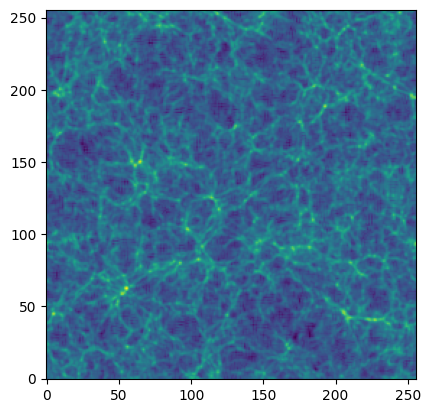

In [3]:
# plot data
plt.figure()
plt.imshow(jnp.log(rho[N//2]), origin='lower')

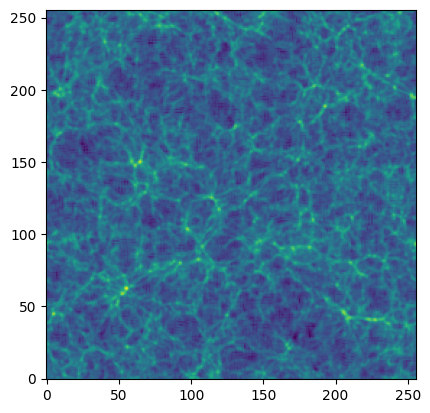

In [25]:
#  create sinewave 3D field
x, y, z = jnp.meshgrid(jnp.arange(N), jnp.arange(N), jnp.arange(N))
rho_2 = rho * (\
    jnp.sin(30*2 * jnp.pi * (x + y + z) / N)*0.01 +\
    jnp.sin(90*2 * jnp.pi * (x + y + z) / N)*0.04 +\
    1)

delta_2 = cosmax.helpers.compute_overdensity(rho_2)

# plot data
plt.figure()
plt.imshow(jnp.log(rho_2[N//2]), origin='lower')


In [26]:
ps = cosmax.spectral_ops.SpectralLoss(
    N, MPH_h, 80)

k, Pk = ps(delta, delta_2)


Text(0, 0.5, '$P(k)$ [$h^{-3} \\ \\mathrm{Mpc}^3$]')

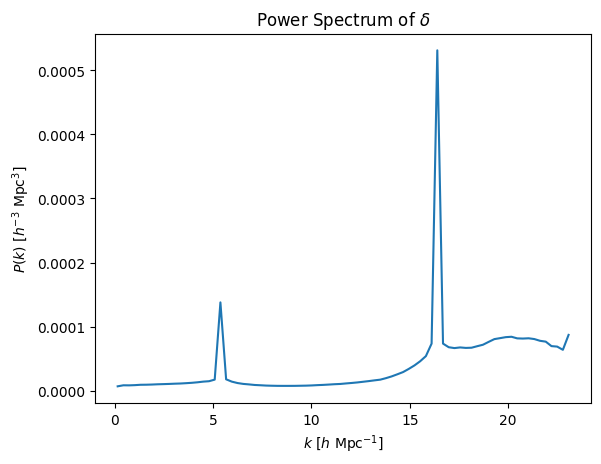

In [27]:
plt.plot(k, Pk, label='cosmax')
plt.title(r'Power Spectrum of $\delta$')
plt.xlabel(r'$k$ [$h \ \mathrm{Mpc}^{-1}$]')
plt.ylabel(r'$P(k)$ [$h^{-3} \ \mathrm{Mpc}^3$]')